## Volume change and vertical displacement
The purpose of this code is to establish a model relationship between volume change (based on JABLTCX data) and elevation change/vertical displacement (based on ASF satellite data). 

### Is there any way to tie these JABLTCX data to geographic locations? I don't see coordinates anywhere...

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import earthpy.plot as ep
import rasterio as rio
import rioxarray as rxr
import scipy.stats as stats

In [2]:
df_JABLTCX = pd.read_csv("../RawData/beach volume change (cy) post matthew.csv")
df_JABLTCX.head()

,OBJECTID,State,Segment,stTranNum,MHW,dVol,dMean,dDensity,Start_Date,End_Date,...,Shape,Shape.STArea(),Shape.STLength(),GlobalID,created_user,created_date,last_edited_user,last_edited_date,x,y
0,7,VA,12,1793,0.26,3148,0.13,9.6,20140720.0,20161101.0,...,NaN,0.00002,0.046282,{42D87962-72D6-4220-9020-AC84CC37184A},NaN,NaN,NaN,NaN,NaN,NaN
1,8,VA,12,1794,0.26,3383,0.14,10.3,20140720.0,20161101.0,...,NaN,0.00002,0.046281,{4B86FE4C-B72A-4A57-AE1F-7B70BF803A66},NaN,NaN,NaN,NaN,NaN,NaN
2,9,VA,12,1795,0.26,0,NaN,NaN,20140720.0,20161101.0,...,NaN,0.00002,0.046281,{1FA860A5-9866-4732-A144-67E2EB3CF209},NaN,NaN,NaN,NaN,NaN,NaN
3,10,VA,12,1796,0.26,1354,0.05,4.1,20140720.0,20161101.0,...,NaN,0.00002,0.046281,{3082179D-694C-473C-86DC-9921A2DA89A0},NaN,NaN,NaN,NaN,NaN,NaN
4,11,VA,12,1797,0.26,3014,0.12,9.2,20140720.0,20161101.0,...,NaN,0.00002,0.046280,{E00405F6-DE89-46FD-A625-D12E9DBD9775},NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_JABLTCX_NC = df_JABLTCX[df_JABLTCX["State"] == "NC"]

In [8]:
len(df_JABLTCX_NC)

958

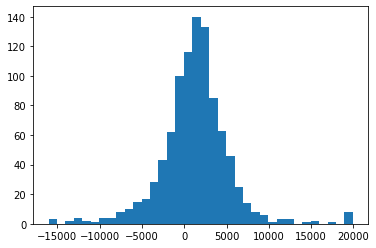

In [25]:
# outliers are shown in final bin, actually 19050+
bins=np.arange(-16050, 20000, 1000)
#print(bins)
plt.hist(np.clip(df_JABLTCX_NC['dVol'], bins[0], bins[-1]), bins=bins)
plt.show()

In [35]:
vert_disp_rxr = rxr.open_rasterio(
    "../ProcessedData/complete_clipped_2018_10_08_to_11_25_combined.tif",
    masked=True,
)

In [43]:
vert_disp = vert_disp_rxr.values[0]
vert_disp[vert_disp==0]=['nan']
vert_disp = vert_disp[np.logical_not(np.isnan(vert_disp))]
vert_disp = vert_disp.flatten()

In [ ]:
# now we need to figure out how to directly compare them... maybe reproject vert_disp so it has the same number of values
# as dVol?

In [44]:
slope, intercept, r_value, _, _ = stats.linregress(vert_disp, df_JABLTCX_NC['dVol'])

print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6691222 and the array at index 1 has size 958